In [2]:
import pyuvdata
import numpy as np
import sys
sys.path.append("/home/rbyrne/rlb_LWA/beam_manipulation")
import jones_to_mueller
import importlib
importlib.reload(jones_to_mueller)
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy
import scipy.interpolate

In [3]:
beam_path = "/lustre/rbyrne/LWA_10to100_MROsoil_efields.fits"
beam = pyuvdata.UVBeam()
beam.read(beam_path)
beam.select(axis2_inds=np.where(beam.axis2_array <= np.pi/2)[0])
beam.peak_normalize()

In [4]:
# Beam manipulations
beam_radec = jones_to_mueller.pol_basis_transform_azza_to_radec(beam, latitude=37.23, inplace=False)
mueller_coherency = jones_to_mueller.convert_jones_to_mueller(beam_radec)
mueller_stokes = jones_to_mueller.pol_basis_transform_radec_to_stokes(mueller_coherency, inplace=False)
mueller_pstokes = jones_to_mueller.pol_basis_transform_instrumental_to_pseudostokes(mueller_stokes)

In [5]:
unpolarized_beam = mueller_pstokes[0, 0, 0, :, :, :]

In [6]:
az_axis = np.degrees(beam_radec.axis1_array)
za_axis = np.degrees(beam_radec.axis2_array)
za_vals, az_vals = np.meshgrid(za_axis, az_axis)

In [7]:
ra_vals, dec_vals = jones_to_mueller.coordinate_transfrom_azza_to_radec(np.radians(az_vals), np.radians(za_vals), 37.23, hour_angle=3.31)

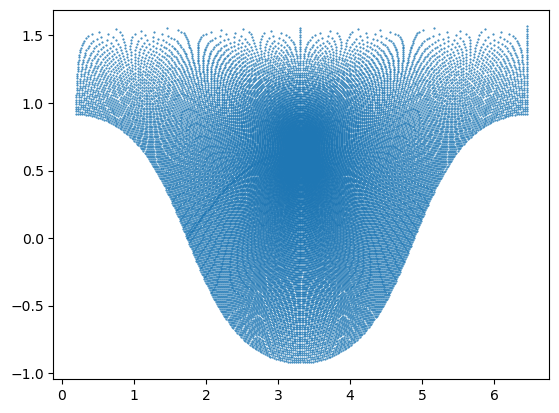

In [8]:
plt.plot(ra_vals.flatten(), dec_vals.flatten(), ".", markersize=1)
plt.show()

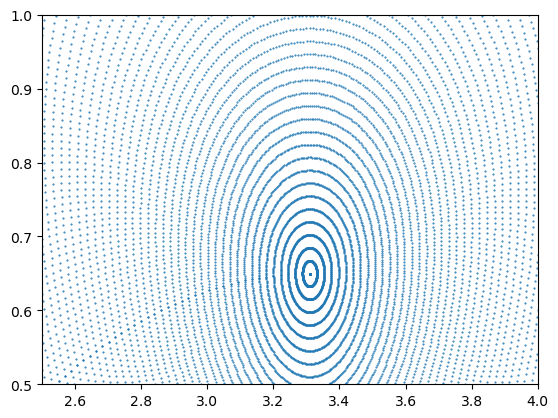

In [9]:
plt.plot(ra_vals.flatten(), dec_vals.flatten(), ".", markersize=1)
plt.xlim([2.5,4])
plt.ylim([.5,1])
plt.show()

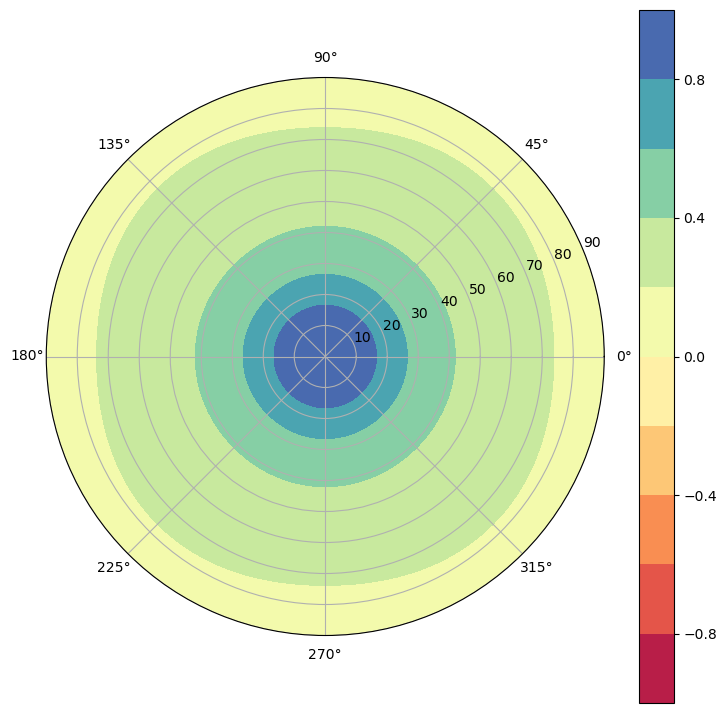

In [10]:
az_axis = np.degrees(beam_radec.axis1_array)
za_axis = np.degrees(beam_radec.axis2_array)
za_vals, az_vals = np.meshgrid(za_axis, az_axis)
fig, ax = plt.subplots(
    nrows=1, ncols=1, subplot_kw=dict(projection="polar"), figsize=(9, 9)
)
freq_ind = np.where(beam.freq_array == 100e6)[0][0]
contourplot = jones_to_mueller.make_polar_contour_plot(
    ax,
    np.real(unpolarized_beam[freq_ind, :, :].T/2),
    np.radians(az_vals),
    za_vals,
)
fig.colorbar(contourplot, ax=ax)
plt.show()

In [11]:
target_ra = (12+30/60+58/60**2)/12*np.pi
target_dec = np.radians(12+6/60+19/60**2)
freq_ind = np.where(beam.freq_array == 50e6)[0][0]
beam_val_interp = scipy.interpolate.griddata((ra_vals.flatten(), dec_vals.flatten()), np.real(unpolarized_beam[freq_ind, :, :].T/2).flatten(), ([target_ra, target_dec]), method="cubic")

In [12]:
print(beam_val_interp)

[0.83291018]


In [13]:
beam_val_interp = np.zeros(beam.Nfreqs)
for freq_ind in range(beam.Nfreqs):
    beam_val_interp[freq_ind] = scipy.interpolate.griddata((ra_vals.flatten(), dec_vals.flatten()), np.real(unpolarized_beam[freq_ind, :, :].T/2).flatten(), ([target_ra, target_dec]), method="cubic")

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


In [14]:
for freq_ind in range(beam.Nfreqs):
    print(beam_val_interp[freq_ind])

0.8601389172804809
0.8580842556152285
0.855889001510788
0.8536749312766494
0.8513977348833855
0.8491089441014059
0.8468100027192091
0.8444829931885742
0.8421959423717719
0.8401262799715414
0.8383036896020923
0.8368687244140685
0.8358133733033611
0.8351364023318764
0.8348146494745337
0.834773662539599
0.8349219841497846
0.8351883250045681
0.8355184762641347
0.8358648790183765
0.836197322243808
0.8366228241781577
0.8368808585175792
0.837090834331218
0.8372494421375136
0.8373548318672255
0.8374072790212985
0.8374096715926598
0.8373593080932573
0.8372592718252168
0.83710706718494
0.8369050679844947
0.8366532150036197
0.836351329353327
0.8359989596113744
0.8355960997813169
0.8351469004732743
0.834650981118682
0.8341118108547733
0.8335303454891644
0.8329101766111081
0.8322514580319471
0.8315586209965389
0.8308321317099143
0.8300713210869343
0.8292746329796437
0.8284382190608901
0.8275549523515717
0.8266180480828559
0.825618367749398
0.824542374138256
0.8233917747074817
0.8221645968385387
0.8

In [15]:
for freq_ind in range(beam.Nfreqs):
    print(beam.freq_array[freq_ind])

10000000.0
11000000.0
12000000.0
13000000.0
14000000.0
15000000.0
16000000.0
17000000.0
18000000.0
19000000.0
20000000.0
21000000.0
22000000.0
23000000.0
24000000.0
25000000.0
26000000.0
27000000.0
28000000.0
29000000.0
30000000.0
31000000.0
32000000.0
33000000.0
34000000.0
35000000.0
36000000.0
37000000.0
38000000.0
39000000.0
40000000.0
41000000.0
42000000.0
43000000.0
44000000.0
45000000.0
46000000.0
47000000.0
48000000.0
49000000.0
50000000.0
51000000.0
52000000.0
53000000.0
54000000.0
55000000.0
56000000.0
57000000.0
58000000.0
59000000.0
60000000.0
61000000.0
62000000.0
63000000.0
64000000.0
65000000.0
66000000.0
67000000.0
68000000.0
69000000.0
70000000.0
71000000.0
72000000.0
73000000.0
74000000.0
75000000.0
76000000.0
77000000.0
78000000.0
79000000.0
80000000.0
81000000.0
82000000.0
83000000.0
84000000.0
85000000.0
86000000.0
87000000.0
88000000.0
89000000.0
90000000.0
91000000.0
92000000.0
93000000.0
94000000.0
95000000.0
96000000.0
97000000.0
98000000.0
99000000.0
100000000.